In [1]:
import numpy as np
import cv2
import os
import time
import glob
import matplotlib.pyplot as plt
import scipy.io as scio
import h5py
%matplotlib inline


from keras.models import Sequential, model_from_json, Model, load_model
from keras.optimizers import SGD
from keras.layers import Input, Reshape, concatenate, Activation, Flatten, merge
from keras.layers import Convolution2D, MaxPooling2D, Dense, Dropout
from keras import backend as K
from keras.callbacks import TensorBoard

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def scale_invarient_error(y_true,y_pred):
    log_1=K.log(K.clip(y_pred,K.epsilon(),np.inf)+1.)
    log_2=K.log(K.clip(y_true,K.epsilon(),np.inf)+1.)
    return K.mean(K.square(log_1-log_2),axis=-1)-Lambda*K.square(K.mean(log_1-log_2,axis=-1))

def rescale(data):
    data=data.astype('float32')
    data /= 255.0   
    return data

def pred_single_image_depth_FCRN(path):
    model=load_model(model_dir,custom_objects={'scale_invarient_error':scale_invarient_error})
    path = glob.glob(os.path.join(path, "*.jpg")) #返回所有匹配的文件路径列表
    inputs = []
    targets = []
    out = []
    for i in range(len(path)):
        img = cv2.imread(path[i])
        width = img.shape[1]
        #BGR->RGB
        pic = img[:,:width//2,:][:,:,::-1]
        target = img[:,width//2:,:]
        inputs.append(pic)
        targets.append(target)  
    inputs = np.array([cv2.resize(inputs[i],(img_cols,img_row)) for i in range(len(inputs))])
    targets = np.array([cv2.resize(targets[i],(img_cols,img_row)) for i in range(len(targets))])
    for j in range(1):
    # output[512*512]
        targets = np.array([cv2.pyrDown(targets[i]) for i in range(len(targets))])
    img_array=np.array([cv2.pyrDown(inputs[i]) for i in range(len(inputs))])
    img_array=rescale(img_array)
    targets = rescale(targets)
#     for i in range(len(path)):
#         out.append(model.predict(img_array[i]))
    out = model.predict(img_array)
    return out,targets,img_array

In [3]:
inputpath='/home/Dataset/V_test/' #P_test
img_row=1024
img_cols=1024
Lambda=0.5

root = '/home/smiletranquilly/HeightEstimation/FCRN' 
os.chdir(root)
model_dir='./model/05-26V/FCRN_predict.h5'

In [4]:
ans,targets,img_array=pred_single_image_depth_FCRN(inputpath)


In [5]:
print ans.shape

(2, 512, 512, 1)


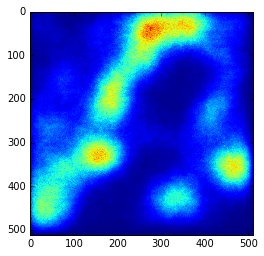

In [10]:
plt.imshow(ans[0][:,:,0])

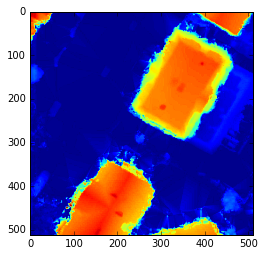

In [11]:
plt.imshow(targets[0][:,:,0])

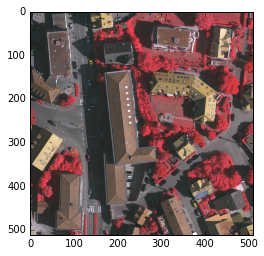

In [9]:
plt.imshow(img_array[3])

In [5]:
import scipy
for i in range(len(img_array)):
    scipy.misc.imsave("./img/picV/inputs/inputs_"+str(i)+".jpg", img_array[i])
    scipy.misc.imsave("./img/picV/outputs/outputs_"+str(i)+".jpg", ans[i][:,:,0])
    scipy.misc.imsave("./img/picV/targets/targets_"+str(i)+".jpg", targets[i][:,:,0])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """


# test

In [6]:
path = glob.glob(os.path.join(inputpath, "*.jpg")) #返回所有匹配的文件路径列表
print path

['/home/Dataset/Vaihingen_test/top_mosaic_09cm_area3_90_row1_col2.jpg', '/home/Dataset/Vaihingen_test/top_mosaic_09cm_area3_90_row1_col1.jpg', '/home/Dataset/Vaihingen_test/top_mosaic_09cm_area23_90_row1_col1.jpg', '/home/Dataset/Vaihingen_test/top_mosaic_09cm_area7_90_row1_col1.jpg', '/home/Dataset/Vaihingen_test/top_mosaic_09cm_area3_row2_col1.jpg', '/home/Dataset/Vaihingen_test/top_mosaic_09cm_area28_90_row1_col1.jpg', '/home/Dataset/Vaihingen_test/top_mosaic_09cm_area37_90_row1_col1.jpg', '/home/Dataset/Vaihingen_test/top_mosaic_09cm_area26_90_row1_col1.jpg', '/home/Dataset/Vaihingen_test/top_mosaic_09cm_area1_90_row1_col1.jpg', '/home/Dataset/Vaihingen_test/top_mosaic_09cm_area21_90_row1_col1.jpg', '/home/Dataset/Vaihingen_test/top_mosaic_09cm_area11_90_row1_col1.jpg', '/home/Dataset/Vaihingen_test/top_mosaic_09cm_area30_90_row1_col1.jpg', '/home/Dataset/Vaihingen_test/top_mosaic_09cm_area15_90_row1_col1.jpg', '/home/Dataset/Vaihingen_test/top_mosaic_09cm_area32_90_row1_col1.jpg',

In [7]:
inputs = []
targets = []
out = []
for i in range(len(path)):
    img = cv2.imread(path[i])
    width = img.shape[1]
    #BGR->RGB
    pic = img[:,:width//2,:][:,:,::-1]
    target = img[:,width//2:,:]
    inputs.append(pic)
    targets.append(target)
inputs = np.array([cv2.resize(inputs[i],(img_cols,img_row)) for i in range(len(inputs))])
targets = np.array([cv2.resize(targets[i],(img_cols,img_row)) for i in range(len(targets))])
print inputs[1].shape

(1024, 1024, 3)


In [9]:
print len(inputs)
print len(targets)

16
16
